In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

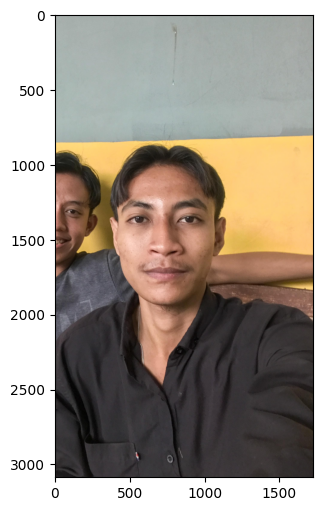

In [17]:
plt.figure(figsize=(6,6))
chico = imread('chico1.jpg')
plt.imshow(chico);

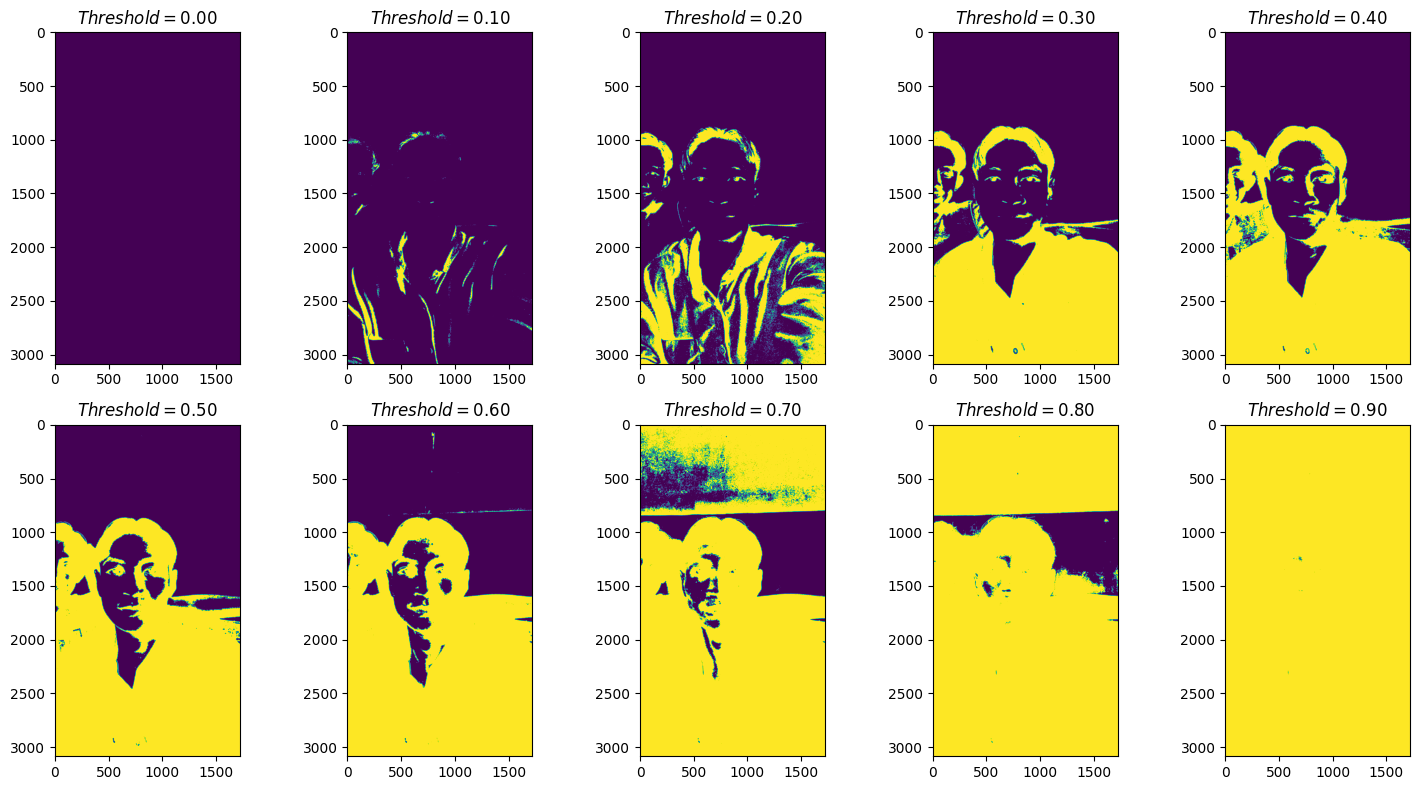

In [18]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))

chico_gray = rgb2gray(chico)
for th, ax in zip(th_values, axis.flatten()):

    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized)
    ax.set_title('$Threshold = %.2f$' % th)
plt.tight_layout()

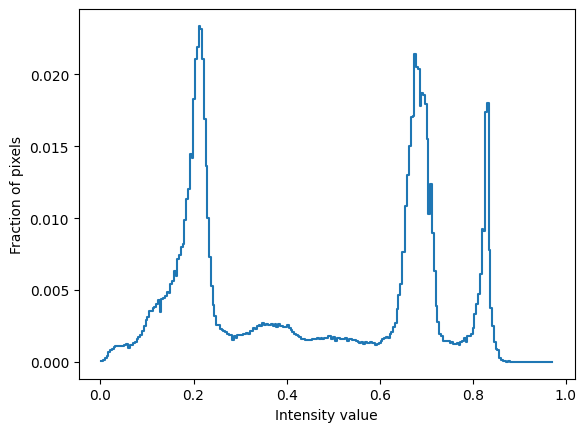

In [19]:
freq, bins = histogram(chico_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

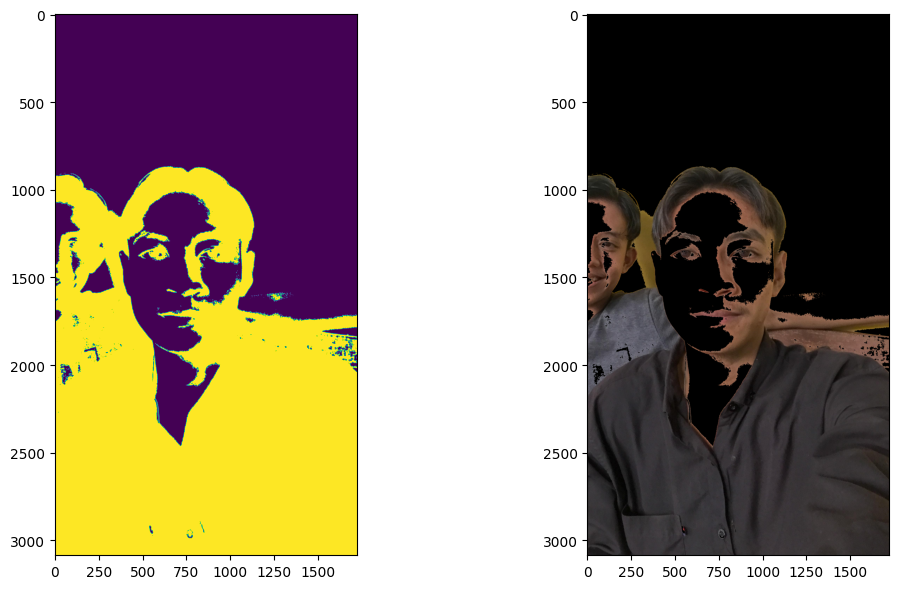

In [20]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

fig, ax = plt.subplots(1, 2, figsize=(12,6))

thresh = threshold_otsu(chico_gray)
chico_otsu  = chico_gray < thresh
ax[0].imshow(chico_otsu)

filtered = masked_image(chico, chico_otsu)
ax[1].imshow(filtered)

plt.tight_layout()

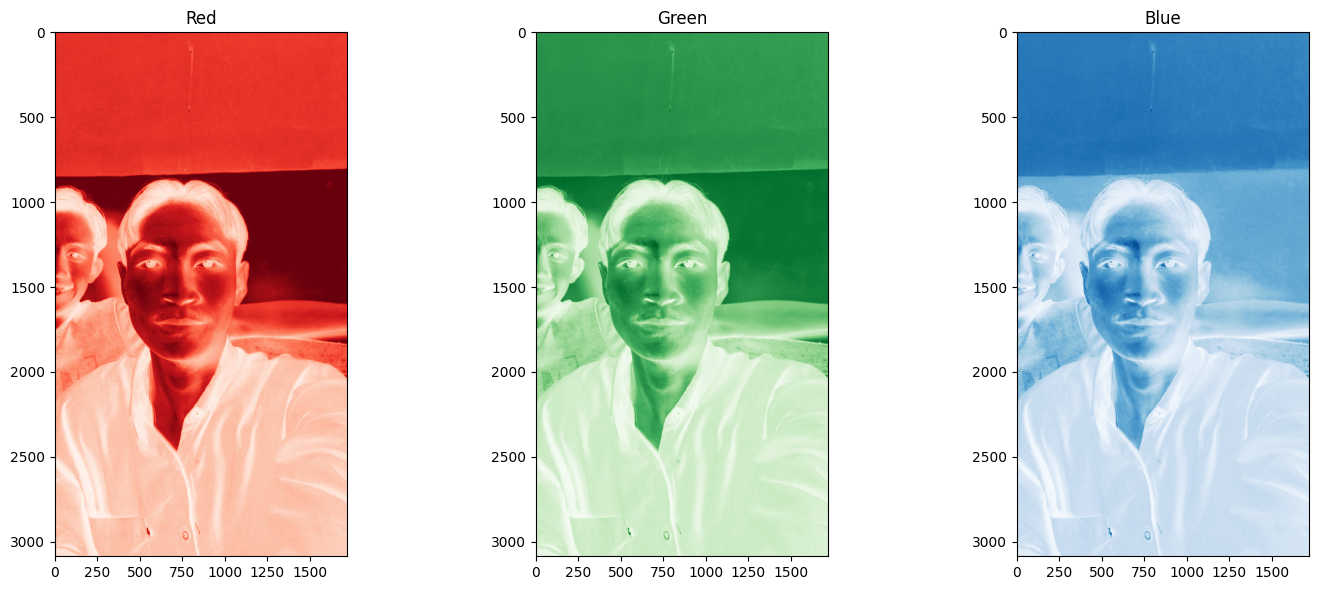

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))

ax[0].imshow(chico[:,:,0], cmap='Reds')
ax[0].set_title('Red')

ax[1].imshow(chico[:,:,1], cmap='Greens')
ax[1].set_title('Green')

ax[2].imshow(chico[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

plt.tight_layout()